In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# develop a global transfare matrix
def f(x,y):
        difference = x-y
        square = difference**2
        negate = -square
        return  0.1*np.exp(negate/2)
def matrix():
        v = np.linspace(0,10,50)
        w = np.linspace(0,10,50)

        matrix=np.ones((len(v),len(w)))
        for i in range(len(v)):
            for j in range(len(w)): 
                    matrix[i][j]=f(w[j],v[i])
        return matrix
matrix1 = matrix()

In [123]:
#find the constant of normalizing matrix (Pij/Pj)
W=2
P=np.matmul([W]*len(matrix1),matrix1)
con=np.divide(W*matrix1,P)

In [124]:
# Find the measured results (fj)   
x=np.linspace(0,10,50)#defining the x-axis
def find_fj():
    def f(x):
        return (np.exp(-x**2))
    y = np.zeros(len(x))
    for i in range(len(x)):
            y[i]=(f(x[i]))


    f=np.matmul(matrix1,y)
    return f

measured_results = find_fj()
noisy=measured_results.copy()

In [125]:
#distorting measured results
for i in range(len(noisy)):
    if (noisy[i]>0.2):
        noisy[i]= noisy[i] + ((np.random.normal(0,1))*0.2)

In [126]:
def f(x):
    return (np.exp(-x**2))
y = np.zeros(len(x))
for i in range(len(x)):
        y[i]=(f(x[i]))
original=y

In [127]:
#Find working fj:
def working_fj(transfareMatrix,result):
    return np.matmul(transfareMatrix,result)

result=np.ones(len(matrix1[1]))
fnj=working_fj(matrix1,result)

In [128]:
def Regular(recovered):
    c=1 #current
    p=c-1 #past
    f=c+1 #future
    Wrt=0.01 #rationalizing "weight"
    for i in range(len(recovered)-1):
        if ((recovered[p]>recovered[c]) and (recovered[c]<recovered[f])):
            recovered[c]=(recovered[c]/(1-Wrt))
        elif ((recovered[c]>recovered[p]) and (recovered[c]>recovered[p])):
            recovered[c]=(recovered[c]/(1+Wrt))
        else:
            recovered[c]=recovered[c]
        c+=1
        p=c-1
        f=c+1
        if f==len(recovered):
            break
    return recovered

In [129]:
def Recover(actual,measured,varying,k):
    var = np.divide(measured,varying)
    prem_res = np.matmul(var,k)
    final_result= prem_res*actual
    return final_result


In [130]:
rec =np.ones(len(x))
n=0
while (n<5):
    fnj=working_fj(matrix1,rec)
    rec=Recover(rec,noisy,fnj,con)
    rec=Regular(rec)
    n+=1
recovered=rec.copy()
print(np.shape(recovered))

(50,)


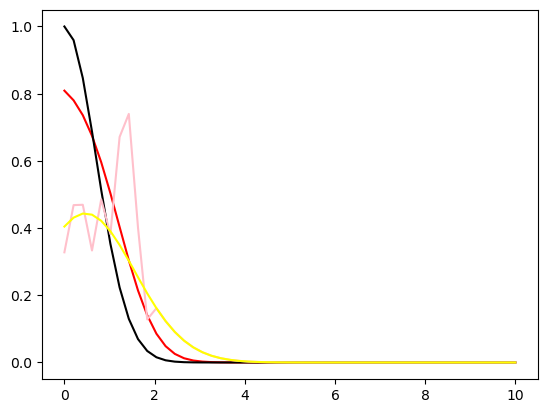

In [134]:
band=[]
n=0
while(n<50):
    for i in range(50+1):
        fnj=working_fj(matrix1,rec)
        rec=Recover(rec,noisy,fnj,con)
        rec=Regular(rec)
        band.append(rec)
        i+=1
        n+=1


#for element in band:
   # plt.plot(element)
plt.plot(x,recovered, color='red')
plt.plot(x,original, color ='black')
plt.plot(x,noisy,color="pink")
plt.plot(x,measured_results,color="yellow")
plt.show()

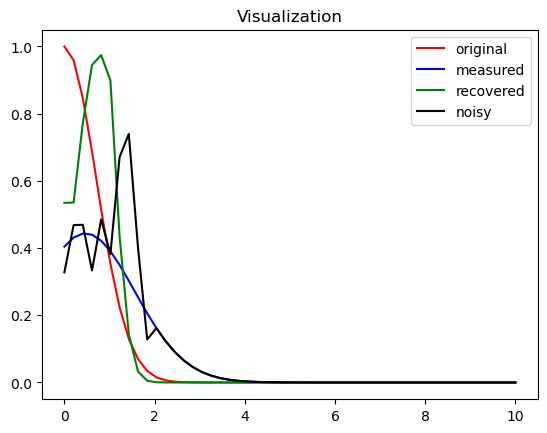

'plt.plot(x,measured_results,"blue",label="measured")\nplt.plot(x,noisy,"black",label="noisy")\nplt.title("No idea at this point")\nplt.legend()\nplt.show()\n\nplt.plot(x,noisy,"blue",label="measured")\nplt.title("Noisy")\nplt.legend()\nplt.show\n\n\nplt.plot(x,original,"red",label="original")\nplt.plot(x,measured_results,"blue",label="measured")\nplt.plot(x,rec,"green",label="recovered")\nplt.plot(x,noisy,"black",label="noisy")\nplt.title("Focusing On the positive (pun intended)")\nplt.ylim(min(noisy),max(noisy)+1)\nplt.xlim(0,max(x)+5)\nplt.legend()\nplt.show()'

In [132]:

    plt.plot(x,original,"red",label="original")
    plt.plot(x,measured_results,"blue",label="measured")
    plt.plot(x,rec,"green",label="recovered")
    plt.plot(x,noisy,"black",label="noisy")
    plt.title("Visualization")
  
   # plt.ylim(min(noisy-1),max(noisy)+1)
   # plt.xlim(min(x)-1,max(x)+5)
    plt.legend()
    plt.show()
    
    '''plt.plot(x,original,"red",label="original")
    plt.show'''
    '''plt.plot(x,measured_results,"blue",label="measured")
    plt.plot(x,noisy,"black",label="noisy")
    plt.title("No idea at this point")
    plt.legend()
    plt.show()
    
    plt.plot(x,noisy,"blue",label="measured")
    plt.title("Noisy")
    plt.legend()
    plt.show
    
    
    plt.plot(x,original,"red",label="original")
    plt.plot(x,measured_results,"blue",label="measured")
    plt.plot(x,rec,"green",label="recovered")
    plt.plot(x,noisy,"black",label="noisy")
    plt.title("Focusing On the positive (pun intended)")
    plt.ylim(min(noisy),max(noisy)+1)
    plt.xlim(0,max(x)+5)
    plt.legend()
    plt.show()'''
    